# Get the data

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-02-24 23:58:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  82.5MB/s    in 1.3s    

2022-02-24 23:58:14 (82.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# Inspect the data

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:
- A train directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
- A test directory with the same structure as the train directory.



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walkthrough pizza_steak directory and list number of files
for dirpath, dirnames, filenames, in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}') # show the shape of the image
  return img

Image shape: (512, 512, 3)


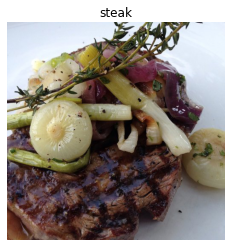

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='steak')

In [10]:
# View the img (actually just a big array/tensor)
img

array([[[195, 204, 219],
        [195, 204, 219],
        [196, 205, 220],
        ...,
        [225, 233, 246],
        [220, 228, 241],
        [215, 223, 236]],

       [[196, 205, 220],
        [196, 205, 220],
        [197, 206, 221],
        ...,
        [231, 239, 252],
        [227, 235, 248],
        [224, 232, 245]],

       [[197, 206, 221],
        [197, 206, 221],
        [198, 207, 222],
        ...,
        [234, 242, 255],
        [233, 241, 254],
        [231, 239, 252]],

       ...,

       [[131,  75,  52],
        [121,  65,  42],
        [114,  58,  35],
        ...,
        [181, 190, 207],
        [181, 190, 207],
        [180, 189, 206]],

       [[150,  94,  71],
        [144,  88,  65],
        [124,  68,  45],
        ...,
        [180, 189, 206],
        [181, 190, 207],
        [182, 191, 208]],

       [[151,  93,  71],
        [153,  97,  74],
        [137,  81,  58],
        ...,
        [179, 188, 205],
        [181, 190, 207],
        [182, 191, 208]]

In [11]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

Looking at the image shape more closely, you'll see it's in the form (Width, Height, Colour Channels).

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of red, green and blue (RGB) pixels.

You'll notice all of the values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [12]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.76470588, 0.8       , 0.85882353],
        [0.76470588, 0.8       , 0.85882353],
        [0.76862745, 0.80392157, 0.8627451 ],
        ...,
        [0.88235294, 0.91372549, 0.96470588],
        [0.8627451 , 0.89411765, 0.94509804],
        [0.84313725, 0.8745098 , 0.9254902 ]],

       [[0.76862745, 0.80392157, 0.8627451 ],
        [0.76862745, 0.80392157, 0.8627451 ],
        [0.77254902, 0.80784314, 0.86666667],
        ...,
        [0.90588235, 0.9372549 , 0.98823529],
        [0.89019608, 0.92156863, 0.97254902],
        [0.87843137, 0.90980392, 0.96078431]],

       [[0.77254902, 0.80784314, 0.86666667],
        [0.77254902, 0.80784314, 0.86666667],
        [0.77647059, 0.81176471, 0.87058824],
        ...,
        [0.91764706, 0.94901961, 1.        ],
        [0.91372549, 0.94509804, 0.99607843],
        [0.90588235, 0.9372549 , 0.98823529]],

       ...,

       [[0.51372549, 0.29411765, 0.20392157],
        [0.4745098 , 0.25490196, 0.16470588],
        [0.44705882, 0

# An end-to-end example

We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

Reading the original dataset authors paper, we see they used a Random Forest machine learning model and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

Note: A baseline is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.

The code in the following cell replicates and end-to-end way to model our pizza_steak dataset with a convolutional neural network (CNN) using the components listed above.

For reference, the model we're using replicates TinyVGG, the computer vision architecture which fuels the CNN explainer webpage.

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 281ms/step - loss: 0.5538 - accuracy: 0.7047 - val_loss: 0.3973 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 12s 247ms/step - loss: 0.4260 - accuracy: 0.8013 - val_loss: 0.3514 - val_accuracy: 0.8740
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3857 - accuracy: 0.8373 - val_loss: 0.3276 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 12s 245ms/step - loss: 0.3504 - accuracy: 0.8507 - val_loss: 0.3001 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 12s 245ms/step - loss: 0.3235 - accuracy: 0.8620 - val_loss: 0.3913 - val_accuracy: 0.8140


In [14]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Now there are a few new things here we haven't discussed, namely:
- The ImageDataGenerator class and the rescale parameter
- The flow_from_directory() method: The batch_size parameter, The target_size parameter
- Conv2D layers (and the parameters which come with them)
- MaxPool2D layers (and their parameters).
- The steps_per_epoch and validation_steps parameters in the fit() function

# Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

We can use all of the same parameters in our previous model except for changing two things:
- The data - we're now working with images instead of dots.
- The input shape - we have to tell our neural network the shape of the images we're working with: A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_2 = model_2.fit(
    train_data, # use same training data created above
    epochs=5, 
    steps_per_epoch=len(train_data),
    validation_data=valid_data, # use same validation data created above
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 10s 212ms/step - loss: 0.9068 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.4747 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
# Checkout our second model architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


model_2 has 602,141 trainable parameters where as model_1 has only 31,101. And despite this difference, model_1 still far and large out performs model_2.

Note: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

In [17]:
# Another model with more layers and neurons

# set random seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model_3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 1.9798 - accuracy: 0.6333 - val_loss: 0.6083 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.8448 - accuracy: 0.7000 - val_loss: 0.8938 - val_accuracy: 0.6260
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6673 - accuracy: 0.7307 - val_loss: 1.4475 - val_accuracy: 0.5440
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6276 - accuracy: 0.7473 - val_loss: 0.8073 - val_accuracy: 0.6860
Epoch 5/5
47/47 [==============================] - 11s 232ms/step - loss: 0.6344 - accuracy: 0.7493 - val_loss: 0.7366 - val_accuracy: 0.6220


In [18]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


# Binary Classification

We just went through a whirlwind of steps:
1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

## 1. Import and become one with the data

Whatever kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


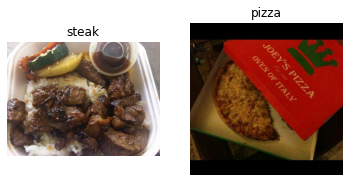

In [19]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Preprocess the data (prepare it for a model)

One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data seperated into train and test directories with subfolders in each for each class.

In [20]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

- 10,000 images (or more) might not fit into the memory of your processor (GPU).
- Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

In [21]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the rescale parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The rescale parameter, along with 1/255. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the flow_from_directory method.

In [22]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Some things to here:

- Due to how our directories are structured, the classes get inferred by the subdirectory names in train_dir and test_dir.
- The target_size parameter defines the input size of our images in (height, width) format.
- The class_mode value of 'binary' defines our classification problem type. If we had more than two classes, we would use 'categorical'.
- The batch_size defines how many images will be in each batch, we've used 32 which is the same as the default.

In [23]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [24]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [25]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. Create a model (start with a baseline)
In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In [26]:
model_4 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         strides=1,
                         padding='valid',
                         activation='relu',
                         input_shape=(224, 224, 3)), # input layer (specify input shape)
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid') # output layer (specify output shape)
])

It follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output

Let's discuss some of the components of the Conv2D layer:
- The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
- filters - these are the number of "feature extractors" that will be moving over our images.
- kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
- stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
- padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

A feature can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these features are not defined by us, instead, the model learns them as it applies different filters across the image.

In [27]:
# Compile the model
model_4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


Since we're working on a binary classification problem (pizza vs. steak), the loss function we're using is 'binary_crossentropy', if it was mult-iclass, we might use something like 'categorical_crossentropy'.

Adam with all the default settings is our optimizer and our evaluation metric is accuracy.

## 4. Fit a model
You'll notice two new parameters here:
- steps_per_epoch - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
- validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [28]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [29]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 274ms/step - loss: 1.0357 - accuracy: 0.6900 - val_loss: 0.4397 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 12s 254ms/step - loss: 0.4492 - accuracy: 0.8020 - val_loss: 0.4429 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 12s 253ms/step - loss: 0.3216 - accuracy: 0.8747 - val_loss: 0.3952 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 12s 254ms/step - loss: 0.1593 - accuracy: 0.9553 - val_loss: 0.4197 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 12s 254ms/step - loss: 0.0834 - accuracy: 0.9760 - val_loss: 0.5185 - val_accuracy: 0.8000


## 5. Evaluate the model

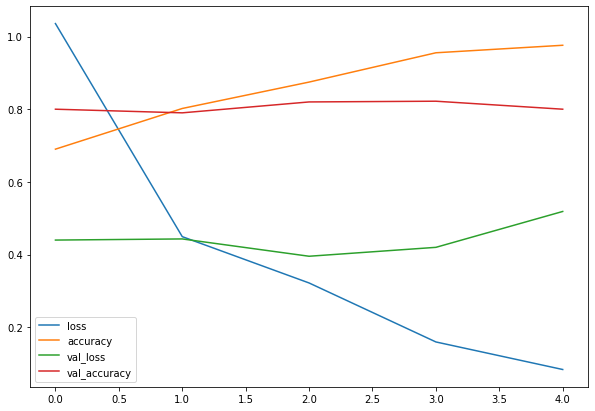

In [30]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Judging by our loss curves, it looks like our model is overfitting the training dataset.

Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

In [31]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

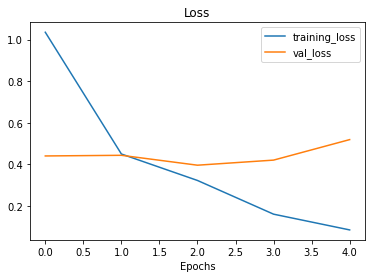

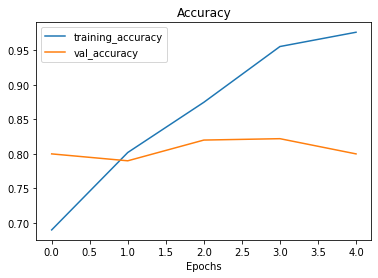

In [32]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [33]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 6. Adjust the model parameters

Fitting a ML model comes in 3 steps:
1. Create a basline.
2. Beat the baseline by overfitting a larger model.
3. Reduce overfitting.

And there are even a few more things we could try to further overfit our model:
- Increase the number of convolutional layers.
- Increase the number of convolutional filters.
- Add another dense layer to the output of our flattened layer.

But what we'll do instead is focus on getting our model's training curves to better align with eachother. 

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world. 

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:
- A ConvNet with max pooling
- A ConvNet with max pooling and data augmentation

For the first model, we'll follow the modified basic CNN structure:


Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output


In [34]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu',input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2), # reduce the number of features by half
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features. We'll see this an example of this in a moment.

In [35]:
# Compile the model
model_5.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [36]:
# Fit the model
history_5 = model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 12s 234ms/step - loss: 0.6023 - accuracy: 0.6727 - val_loss: 0.6119 - val_accuracy: 0.6400
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4826 - accuracy: 0.7873 - val_loss: 0.3983 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4291 - accuracy: 0.8120 - val_loss: 0.3958 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4148 - accuracy: 0.8093 - val_loss: 0.3417 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.3881 - accuracy: 0.8333 - val_loss: 0.3199 - val_accuracy: 0.8680


In [37]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

Do you notice what's going on here with the output shape in each MaxPooling2D layer?

It gets halved each time. This is effectively the MaxPooling2D layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in model_5 and 477,431 in model_4).

Time to check out the loss curves.

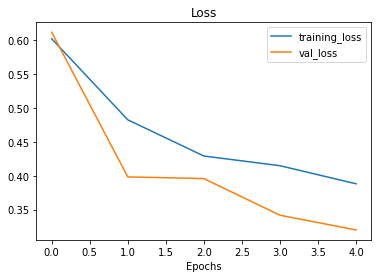

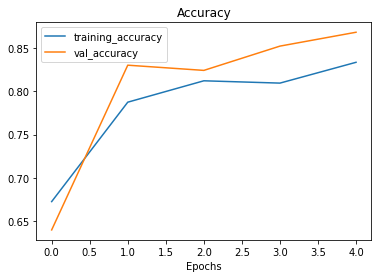

In [38]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our ImageDataGenerator instances.

In [39]:
# Create ImageDataGenerator training isntance with data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20, # rotate the image slightly between 0 and 20 degrees (ntoe: this is an int not a float)
    shear_range=0.2, # shear the image
    zoom_range=0.2, # zoom into the image
    width_shift_range=0.2, # Shift the image width ways
    height_shift_range=0.2, # shift the image height ways
    horizontal_flip=True # flip the image on the horizontal axis
)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

Question: What's data augmentation?

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

Note: Data augmentation is usually only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [40]:
# Import data and augment it from training directory

print('Augmented training images:')
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False # Don't shuffle for demonstration purposes, usually a good thing to shuffle
)

# Create non-augmented data batches
print('Non-augmented training images:')
train_data = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

print('Unchanged test images:')
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [41]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

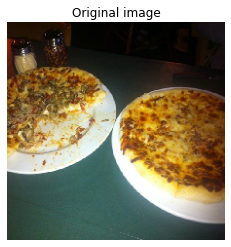

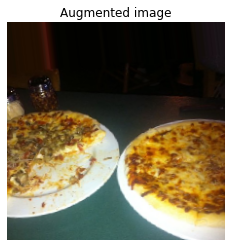

In [42]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images.

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.

🤔 Question: Should I use data augmentation? And how much should I augment?

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the ImageDataGenerator class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

In [43]:
# Create the same model (same as model_5)

model_6 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2), # reduce the number of features by half
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_6 = model_6.fit(
    train_data_augmented, # changed to augmented training data
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 27s 551ms/step - loss: 0.7662 - accuracy: 0.5753 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6931 - accuracy: 0.5053 - val_loss: 0.6572 - val_accuracy: 0.6880
Epoch 3/5
47/47 [==============================] - 25s 534ms/step - loss: 0.7129 - accuracy: 0.5513 - val_loss: 0.6521 - val_accuracy: 0.5940
Epoch 4/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6911 - accuracy: 0.5567 - val_loss: 0.6637 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6805 - accuracy: 0.5720 - val_loss: 0.6406 - val_accuracy: 0.7680


🤔 Question: Why didn't our model get very good results on the training set to begin with?

It's because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time.

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set shuffle=False for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting shuffle=True on future data generators.

You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).

This is because the ImageDataGenerator instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

🔑 Note: One possible method to speed up dataset manipulation would be to look into TensorFlow's parrallel reads and buffered prefecting options.

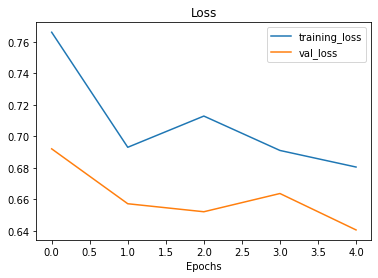

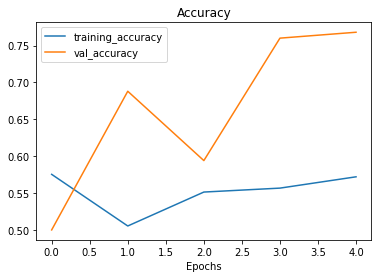

In [44]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [45]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [46]:
# Create the model 

model_7 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')                
])

# Compile the model
model_7.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_7 = model_7.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 26s 551ms/step - loss: 0.6320 - accuracy: 0.6387 - val_loss: 0.5047 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.5179 - accuracy: 0.7493 - val_loss: 0.3814 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 25s 531ms/step - loss: 0.5047 - accuracy: 0.7573 - val_loss: 0.3741 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 25s 528ms/step - loss: 0.4718 - accuracy: 0.7860 - val_loss: 0.3346 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 25s 533ms/step - loss: 0.4607 - accuracy: 0.7793 - val_loss: 0.3450 - val_accuracy: 0.8420


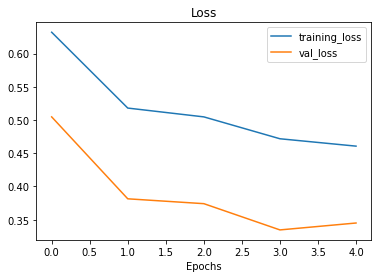

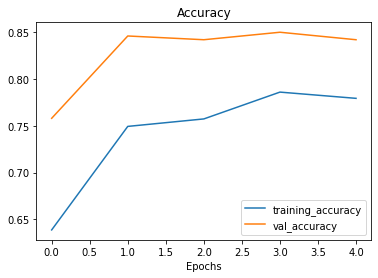

In [47]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

Notice with model_7 how the performance on the training dataset improves almost immediately compared to model_6. This is because we shuffled the training data as we passed it to the model using the parameter shuffle=True in the flow_from_directory method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, our loss curves look a little bit smoother with shuffled data (comparing history_6 to history_7).

## 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

- Increase the number of model layers (e.g. add more convolutional layers).
- Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
- Train for longer (more epochs).
- Finding an ideal learning rate.
- Get more data (give the model more opportunities to learn).
- Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (model_1 or the TinyVGG architecture from CNN explainer).

In [48]:
# Create a CNN model (same as tiny VGG)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_8 = model_8.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 28s 578ms/step - loss: 0.6241 - accuracy: 0.6320 - val_loss: 0.4457 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 27s 575ms/step - loss: 0.5439 - accuracy: 0.7420 - val_loss: 0.4795 - val_accuracy: 0.7500
Epoch 3/5
47/47 [==============================] - 27s 572ms/step - loss: 0.4930 - accuracy: 0.7640 - val_loss: 0.3700 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 33s 711ms/step - loss: 0.4964 - accuracy: 0.7607 - val_loss: 0.4439 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 27s 570ms/step - loss: 0.5085 - accuracy: 0.7533 - val_loss: 0.3744 - val_accuracy: 0.8440


In [49]:
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [50]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

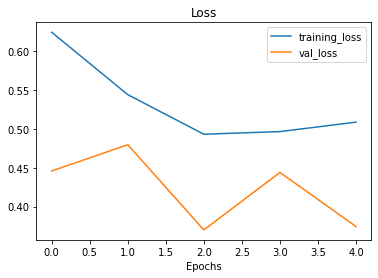

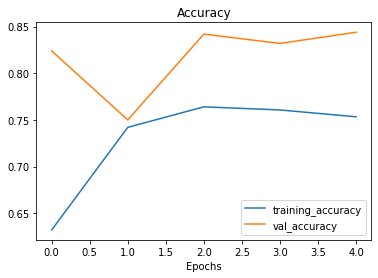

In [51]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

## 9. Making a prediction with our trained model



In [52]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-02-25 00:10:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-02-25 00:10:47 (33.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



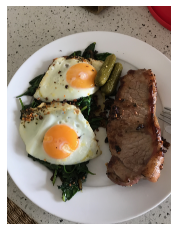

In [53]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [54]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

Since our model takes in images of shapes (224, 224, 3), we've got to reshape our custom image to use it with our model.

To do so, we can import and decode our image using tf.io.read_file (for readining files) and tf.image (for resizing our image and turning it into a tensor).

🔑 Note: For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [55]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [56]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).

We can fix this by adding an extra to our custom image tensor using tf.expand_dims.

In [57]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [58]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

array([[0.8583729]], dtype=float32)

The predictions come out in prediction probability form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the postive class (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the negative class (class 0).

🔑 Note: The 0.5 cutoff can be adjusted to your liking. For example, you could set the limit to be 0.8 and over for the positive class and 0.2 for the negative class. However, doing this will almost always change your model's performance metrics so be sure to make sure they change in the right direction.

But saying positive and negative class doesn't make much sense when we're working with pizza 🍕 and steak 🥩...

So let's write a little function to convert predictions into their class names and then plot the target image.

In [59]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [60]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

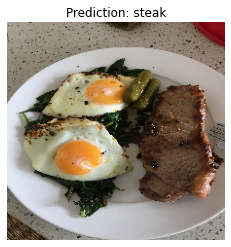

In [61]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2022-02-25 00:10:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-02-25 00:10:50 (43.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



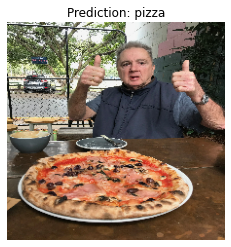

In [62]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

# Multi-class Classification

We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

Remember the steps we took before to build our pizza 🍕 vs. steak 🥩 classifier?


## 1. Import and become one with the data



In [63]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-02-25 00:10:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.195.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   104MB/s    in 6.3s    

2022-02-25 00:10:57 (78.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [64]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [65]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [66]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


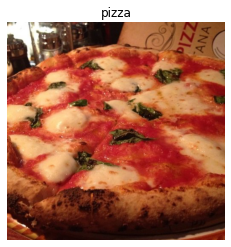

In [67]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

## 2. Preprocess the data


In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


As with binary classifcation, we've creator image generators. The main change this time is that we've changed the class_mode parameter to 'categorical' because we're dealing with 10 classes of food images.

Everything else like rescaling the images, creating the batch size and target image size stay the same.

🤔 Question: Why is the image size 224x224? This could actually be any size we wanted, however, 224x224 is a very common size for preprocessing images to. Depending on your problem you might want to use larger or smaller images.

## 3. Create a model (satrt with a baseline)

We can use the same model (TinyVGG) we used for the binary classification problem for our multi-class classification problem with a couple of small tweaks.

Namely:
- Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
- Changing the output layer to use 'softmax' activation instead of 'sigmoid' activation.
- Changing the loss function to be 'categorical_crossentropy' instead of 'binary_crossentropy'.

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## 4. Fit a model 

In [70]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 241ms/step - loss: 2.1744 - accuracy: 0.1993 - val_loss: 2.0448 - val_accuracy: 0.2600
Epoch 2/5
235/235 [==============================] - 56s 237ms/step - loss: 1.9606 - accuracy: 0.3128 - val_loss: 1.9583 - val_accuracy: 0.3048
Epoch 3/5
235/235 [==============================] - 55s 235ms/step - loss: 1.7436 - accuracy: 0.4081 - val_loss: 1.8899 - val_accuracy: 0.3452
Epoch 4/5
235/235 [==============================] - 55s 233ms/step - loss: 1.3027 - accuracy: 0.5683 - val_loss: 2.1864 - val_accuracy: 0.3076
Epoch 5/5
235/235 [==============================] - 55s 234ms/step - loss: 0.6792 - accuracy: 0.7776 - val_loss: 2.9992 - val_accuracy: 0.2840


Why do you think each epoch takes longer than when working with only two classes of images?

It's because we're now dealing with more images than we were before. We've got 10 classes with 750 training images and 250 validation images each totalling 10,000 images. Where as when we had two classes, we had 1500 training images and 500 validation images, totalling 2000.

The intuitive reasoning here is the more data you have, the longer a model will take to find patterns.

## 5. Evaluate the model

In [71]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 2.9992 - accuracy: 0.2840


[2.999216318130493, 0.2840000092983246]

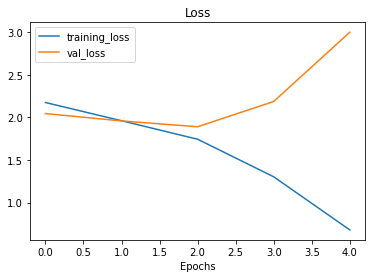

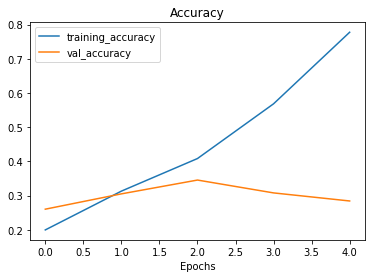

In [72]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

It seems our model is overfitting the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

## 6. Adjust the model parameters

Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

- Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

🔑 Note: Preventing overfitting is also referred to as regularization.


In [73]:
# Try a simplified model (removed 2 layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_10 = model_10.fit(
    train_data, 
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 54s 225ms/step - loss: 2.1526 - accuracy: 0.2549 - val_loss: 1.9579 - val_accuracy: 0.3096
Epoch 2/5
235/235 [==============================] - 52s 221ms/step - loss: 1.7894 - accuracy: 0.3917 - val_loss: 1.8915 - val_accuracy: 0.3412
Epoch 3/5
235/235 [==============================] - 50s 212ms/step - loss: 1.5157 - accuracy: 0.5001 - val_loss: 1.9611 - val_accuracy: 0.3360
Epoch 4/5
235/235 [==============================] - 51s 216ms/step - loss: 1.0692 - accuracy: 0.6541 - val_loss: 2.1379 - val_accuracy: 0.3268
Epoch 5/5
235/235 [==============================] - 50s 212ms/step - loss: 0.6035 - accuracy: 0.8180 - val_loss: 2.5573 - val_accuracy: 0.2884


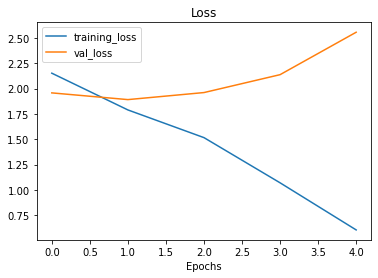

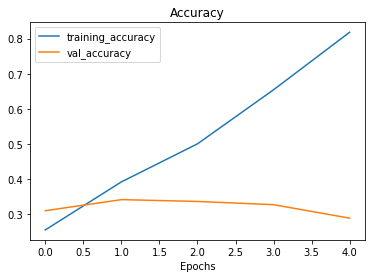

In [74]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

To create augmented data, we'll recreate a new ImageDataGenerator instance, this time adding some parameters such as rotation_range and horizontal_flip to manipulate our images.

In [75]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 7500 images belonging to 10 classes.


Now we've got augmented data, let's see how it works with the same model as before (model_10).

Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called clone_model which can take an existing model and rebuild it in the same format.

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

🔑 Note: One of the key practices in deep learning and machine learning in general is to be a serial experimenter. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

In [88]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_9)

# Compile the cloned model 
model_11.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_11 = model_11.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 132s 557ms/step - loss: 2.2352 - accuracy: 0.1620 - val_loss: 2.0885 - val_accuracy: 0.2204
Epoch 2/5
235/235 [==============================] - 129s 547ms/step - loss: 2.1099 - accuracy: 0.2348 - val_loss: 2.0346 - val_accuracy: 0.2700
Epoch 3/5
235/235 [==============================] - 135s 574ms/step - loss: 2.0623 - accuracy: 0.2647 - val_loss: 1.9665 - val_accuracy: 0.2900
Epoch 4/5
235/235 [==============================] - 130s 553ms/step - loss: 2.0119 - accuracy: 0.2851 - val_loss: 1.8492 - val_accuracy: 0.3608
Epoch 5/5
235/235 [==============================] - 132s 562ms/step - loss: 1.9540 - accuracy: 0.3169 - val_loss: 1.8317 - val_accuracy: 0.3560


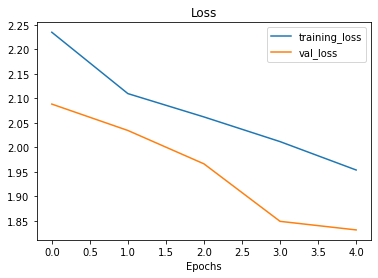

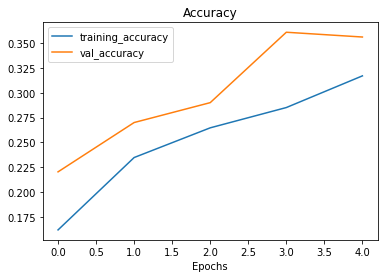

In [89]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

## 7. Repeat Until satisfied

We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's transfer learning.

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

# Making a prediction with our trained model

In [90]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [91]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

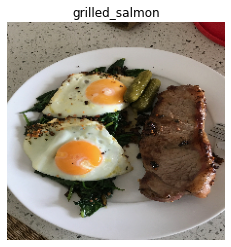

In [92]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [93]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

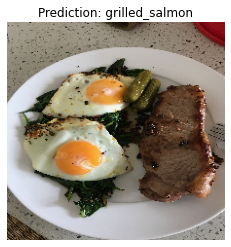

In [94]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

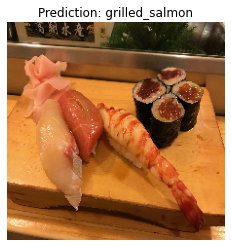

In [95]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

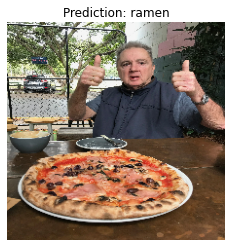

In [96]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

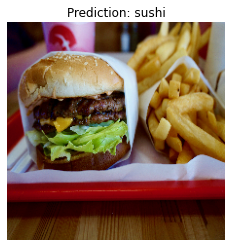

In [97]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

# Saving and Loading our Model

In [98]:
# Save a model
model_11.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [99]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 15s 183ms/step - loss: 1.8317 - accuracy: 0.3560


[1.8316528797149658, 0.35600000619888306]

In [100]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 15s 187ms/step - loss: 1.8317 - accuracy: 0.3560


[1.831653118133545, 0.35600000619888306]